In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

In [3]:
full_data = pd.read_csv('data/Life Expectancy Data 1.csv')
partial_data = pd.read_csv('data/Life Expectancy Data 2.csv')
#full_data_clean = full_data.dropna(how='any')
#print(full_data_clean.columns)
#plt.figure(figsize = (16,5))

#sns.heatmap(full_data_clean.corr(),annot=True,linewidths=1.0)
#partial_data = partial_data.rename(columns={'Life expectancy (Clio-Infra up to 1949; UN Population Division for 1950 to 2015)':'Life Expectancy'},inplace=True)
#partial_data_usa = partial_data.loc[partial_data['Code'] == 'USA']
#partial_data_usa.head()
full_data_usa = full_data.loc[full_data['Country'] == 'United States of America']



In [23]:
# Get prediction dataset 
prediction_data_usa = full_data_usa[['Year','Life expectancy ','Adult Mortality',' BMI ']]
prediction_data_usa.head()

# Correlation Plot on the prediction data
# sns.pairplot(prediction_data_usa)

,Year,Life expectancy,Adult Mortality,BMI
2794,2015,79.3,13.0,69.6
2795,2014,79.1,14.0,69.1
2796,2013,78.9,16.0,68.6
2797,2012,78.8,16.0,68.0
2798,2011,78.7,16.0,67.5


In [5]:
# Assign the data to X and y
X = prediction_data_usa[['Year','Adult Mortality',' BMI ']]
y = prediction_data_usa['Life expectancy ']
#print("Shape: ", X.shape, y.shape)
#plt.figure(figsize = (16,5))
#plt.plot(X, y)

In [6]:
# Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4,random_state=5)


In [7]:
# Create model
model = LinearRegression()


In [8]:
# Fit the model with training data
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Calculate Coeff and Intercepts for Each Factor
print('Model Intercept : ' + str(model.intercept_))
coeff_df = pd.DataFrame(model.coef_,X_train.columns, columns= ['Coeff'])
coeff_df

Model Intercept : -231.2707468028169


,Coeff
Year,0.154148
Adult Mortality,-0.002463
BMI,0.000382


In [10]:
#Predictions

Predictions

In [11]:
# Create predicted model 
predictions= model.predict(X_test)
predictions


array([78.55573994, 79.17563686, 78.23959632, 79.01637192, 77.54492556,
       76.74719026, 77.39297241])

# Plotting Predictions

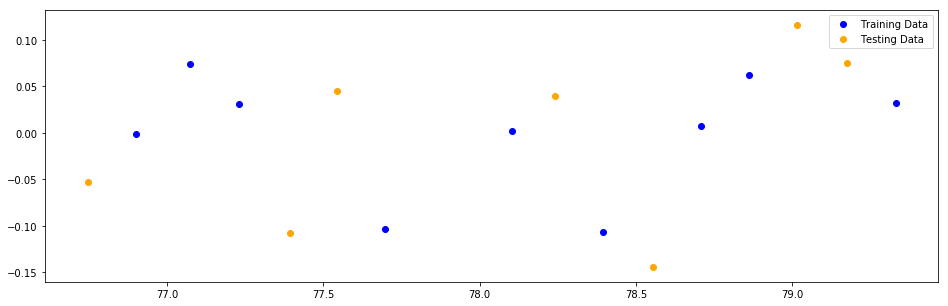

In [12]:
plt.figure(figsize = (16,5))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
#plt.scatter(y_test,predictions)


In [13]:
# Calculate MSE and R2 value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
R2 = r2_score(y_test,predictions)
print("Mean Squared Error : " + str(mse))
print("R2 Score: " + str(R2))

Mean Squared Error : 0.008272039203786207
R2 Score: 0.9868994854238681


In [ ]:
# World Data Predictions - Life Expectancy vs BMI , Life Expectancy vs GDP 

full_data_factors = full_data[['Country','Life expectancy ','Adult Mortality',' BMI ', 'GDP']]
full_data_factors = full_data_factors.dropna(how = 'any')
full_data_factors.rename(columns={' BMI ':'BMI'})
full_data_factors.head()
factors_df = full_data_factors[['Life expectancy ','Adult Mortality',' BMI ', 'GDP']]
factors_df.head()

In [ ]:
sns.pairplot(full_data_factors,hue='Country')

In [ ]:
# Plot on different factor combinations
plt.figure(figsize = (10,5))
plt.scatter(factors_df['GDP'].values,factors_df['Life expectancy '].values)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")

In [ ]:
# create model to train world data

try:
    x = factors_df[' BMI '].values.reshape(-1,1)
    y = factors_df['Life expectancy '].reshape(-1,1)
    # xmin = np.array[X.min()]
    # print(X.shape,y.shape)
    new_model = LinearRegression()
    new_model.fit(x,y)
    plt.figure(figsize=(16,5))
    plt.scatter(x,y, alpha=0.5,c =x)
    print(new_model.intercept_)
    print(new_model.coef_)
    
    plt.xlabel("BMI")
    plt.ylabel("Life Expectancy")
    
    plt.plot(x, new_model.predict(x), color='red', linewidth=1)
    plt.savefig('images/image.jpg')
    plt.show()
    
except Exception as e:
    print(e)